In [2]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = pd.read_excel('data/QualidadeARO3.xlsx')
data = data.drop(columns='Ihavo')

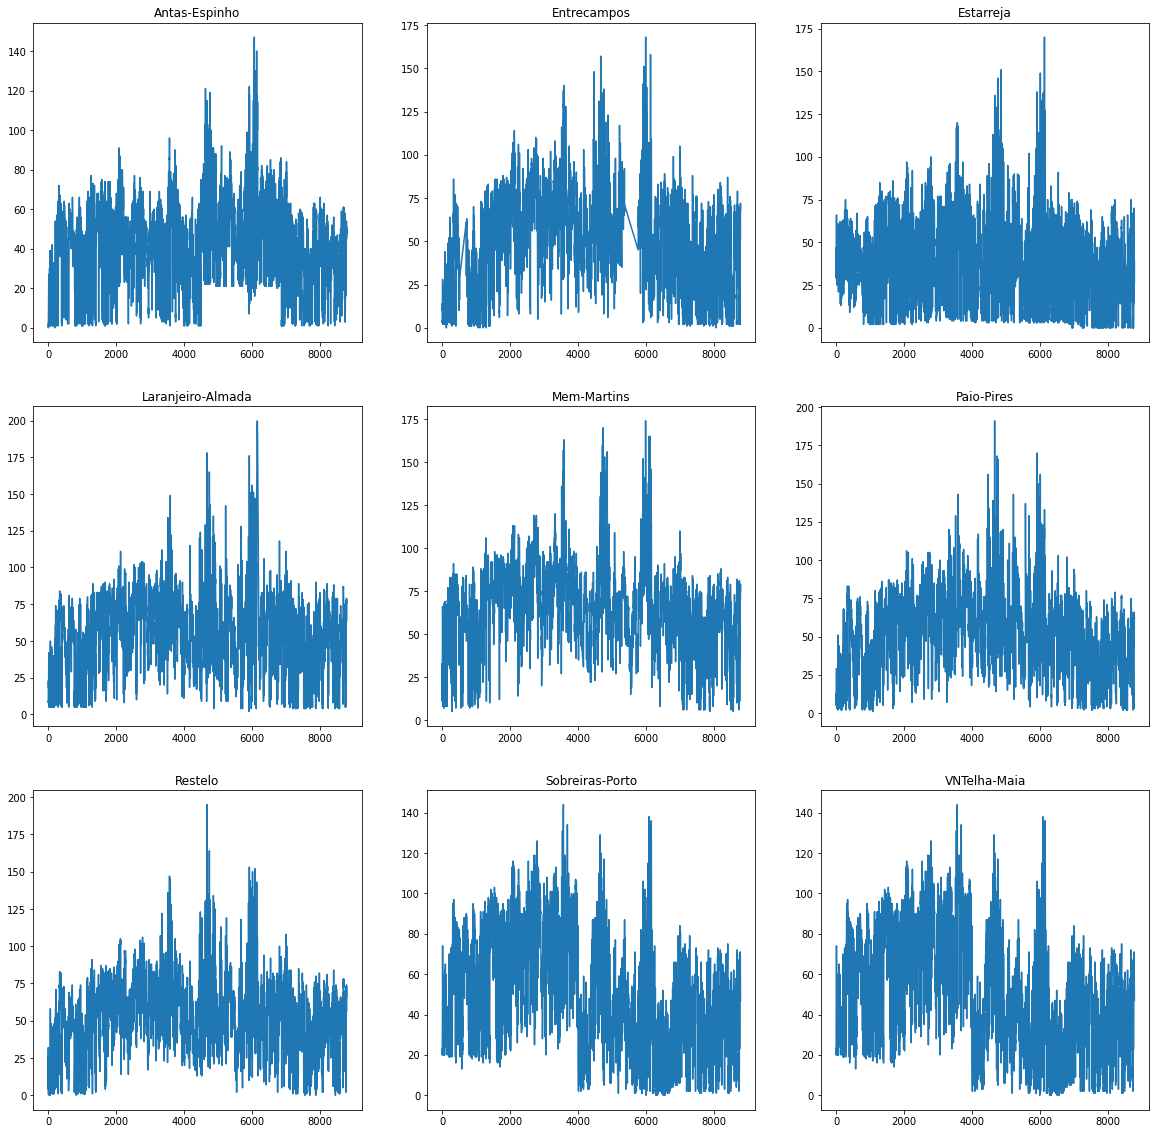

In [4]:
plt.figure(figsize=(20,20))
for idx, o2levels in enumerate(data.columns):
    plt.subplot(3, 3, idx+1)
    plt.plot(data.index, data[o2levels])
    plt.gca().set_title(o2levels)
  
plt.show()

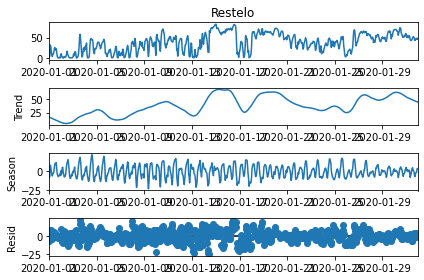

In [5]:
rng = pd.date_range('1/1/2020 00:00', periods=8784, freq='1H')
data.index = rng
restelo = data.Restelo
res = STL(restelo.head(744)).fit()
res.plot()
plt.show()

<Figure size 1440x1440 with 0 Axes>

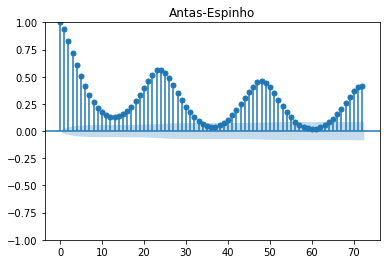

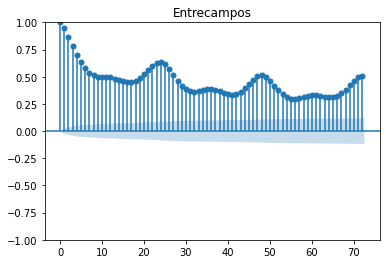

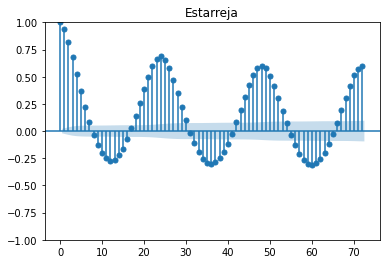

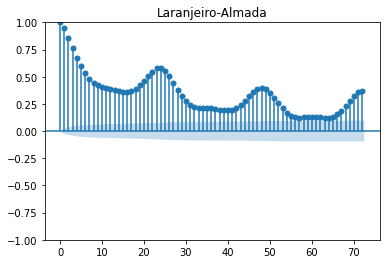

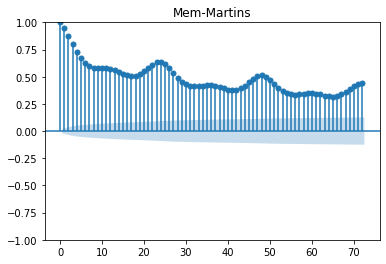

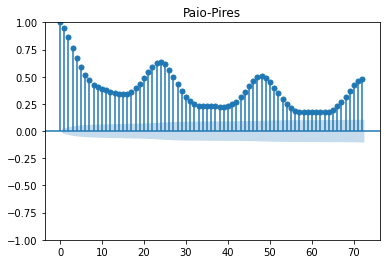

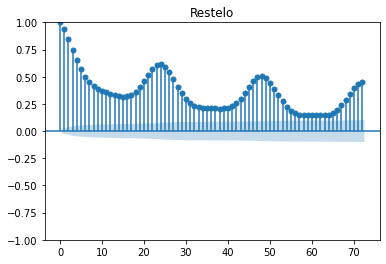

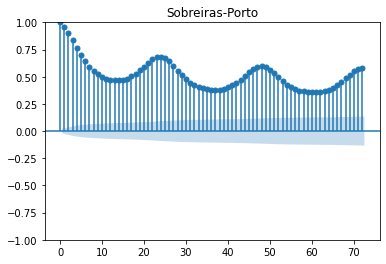

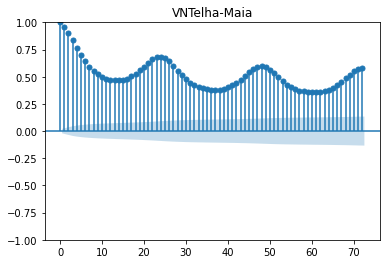

In [13]:
plt.figure(figsize=(20,20))
for idx, o2levels in enumerate(data.columns):
    #plt.subplot(3, 3, idx+1)
    plot_acf(data[o2levels], lags=72, title=o2levels)
plt.show()

In [57]:
data.columns

Index(['Antas-Espinho', 'Entrecampos', 'Estarreja', 'Laranjeiro-Almada',
       'Mem-Martins', 'Paio-Pires', 'Restelo', 'Sobreiras-Porto',
       'VNTelha-Maia'],
      dtype='object')

### 1. Antas-Espinho Analysis

/Users/timmaier/opt/anaconda3/envs/ts/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


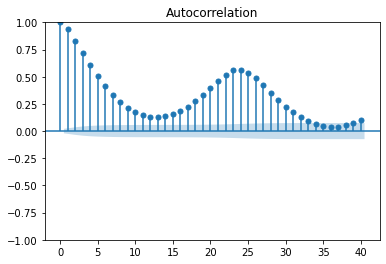

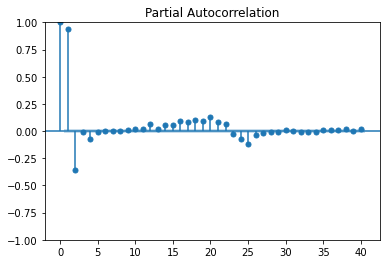

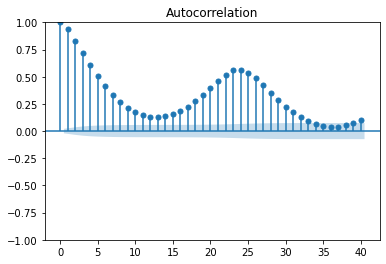

In [52]:
antas = data['Antas-Espinho']
plot_pacf(antas)
plot_acf(antas)

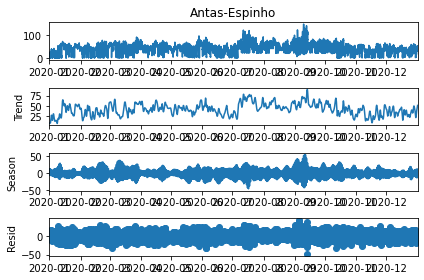

In [53]:
res = STL(antas).fit()
res.plot()
plt.show()

we see that we have a strong trend which indicates the non stationarity of the time series
thus we apply differencing to remove the trend component  

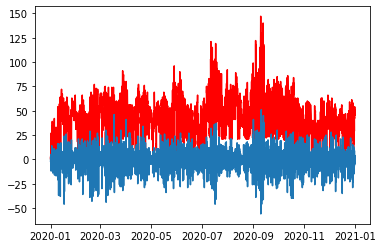

In [54]:
#antas = np.log(antas)
antas = antas.diff()
plt.plot(data.index, data['Antas-Espinho'], color='red')
plt.plot(antas)


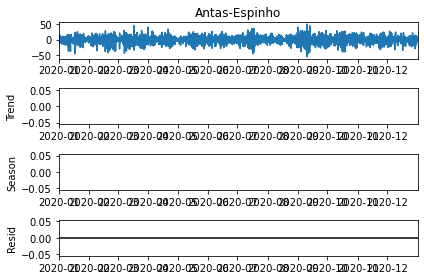

In [55]:
res = STL(antas).fit()
res.plot()
plt.show()

/Users/timmaier/opt/anaconda3/envs/ts/lib/python3.9/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/timmaier/opt/anaconda3/envs/ts/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


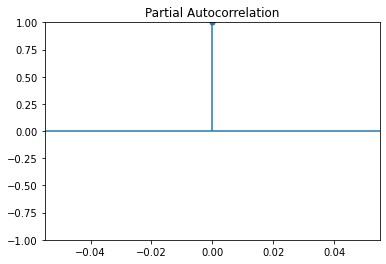

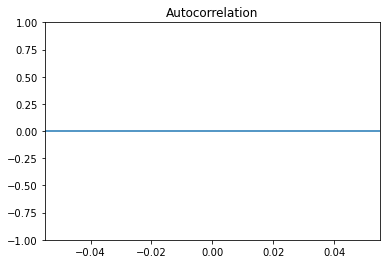

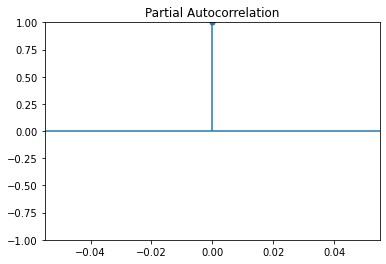

In [56]:
plot_acf(antas)
plot_pacf(antas)

### 2. Entrecampos Analysis

/Users/timmaier/opt/anaconda3/envs/ts/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


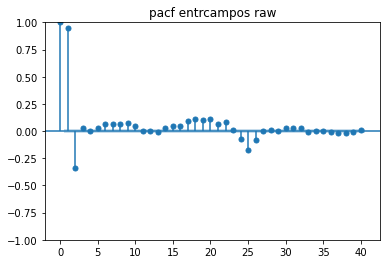

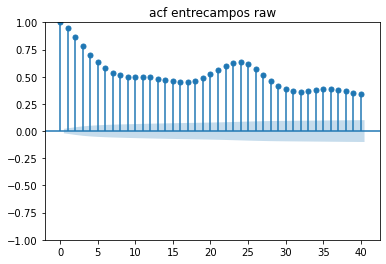

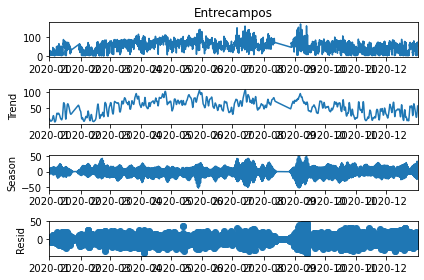

In [87]:
#entrecampos raw
entrecampos = data.Entrecampos
plot_pacf(entrecampos, title='pacf entrcampos raw')
plot_acf(entrecampos, title='acf entrecampos raw')
res = STL(entrecampos).fit()
res.plot()
plt.show()


/Users/timmaier/opt/anaconda3/envs/ts/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


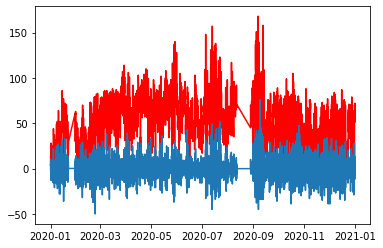

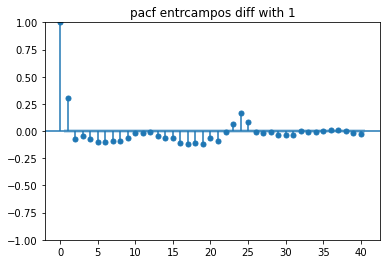

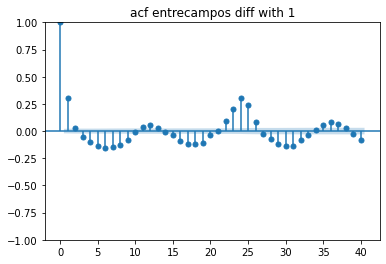

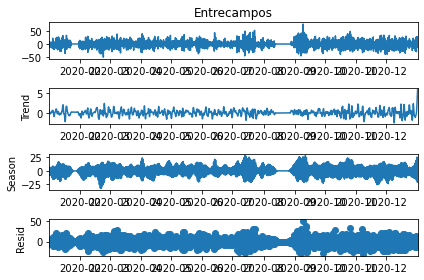

In [88]:
#entrecampos differencing 1
entrecampos = entrecampos.diff()
entrecampos = entrecampos[1:]
plt.plot(data.index, data['Entrecampos'], color='red')
plt.plot(entrecampos)

#pacf, acf plots
plot_pacf(entrecampos, title='pacf entrcampos diff with 1')
plot_acf(entrecampos, title='acf entrecampos diff with 1')
#decomposition plot
res = STL(entrecampos).fit()
res.plot()
plt.show()



/Users/timmaier/opt/anaconda3/envs/ts/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


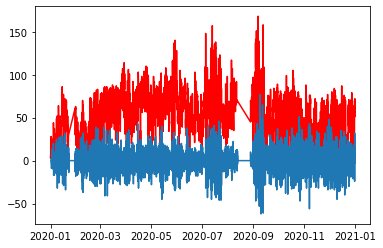

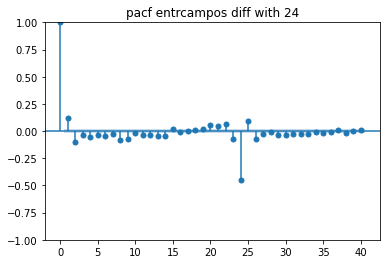

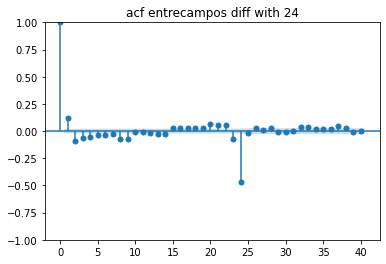

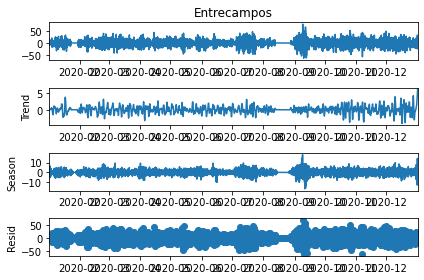

In [89]:
#entrecampos differencing 24
entrecampos = entrecampos.diff(24)
entrecampos = entrecampos[24:]
plt.plot(data.index, data['Entrecampos'], color='red')
plt.plot(entrecampos)

#pacf, acf plots
plot_pacf(entrecampos, title='pacf entrcampos diff with 24')
plot_acf(entrecampos, title='acf entrecampos diff with 24')
#decomposition plot
res = STL(entrecampos).fit()
res.plot()
plt.show()